# Actualización anaconda

## 0. Abrir terminal
Abrir una nueva terminal ya sea usando `anaconda prompt` o cualquier otra terminal. Verificar versión de python ejecutando el comando 
```
conda info
```
Si la versión de python que te arroja el comando anterior es `3.7.x` entonces vamos a proceder a desinstalar la versión de anaconda que tenemos instalada. De lo contrario ir al paso **2**.

## 1. Desinstalar anaconda

### - Usuarios mac o linux
1. Eliminar todo el directorio de instalación de anaconda tipicamente está ubicado en la siguiente dirección:
```
rm -rf ~/anaconda3
```
2. Elimine los siguientes archivos y directorios ocultos, que pueden haber sido creados en el directorio de inicio. Para ello use el siguiente comando:
```
rm -rf ~/.condarc ~/.conda ~/.continuum
```

### - Usuarios windows
En la carpeta donde instaló Anaconda (Ejemplo: `C:\Users\username\Anaconda3`) debe haber un ejecutable llamado Uninstall-Anaconda.exe. Haga doble clic en este archivo para comenzar a desinstalar Anaconda.


## 2. Descargar última versión de Anaconda desde su página
- Ir a el siguiente enlace y en la parte final de dicha página encontrar los archivos a descargar https://www.anaconda.com/products/individual.
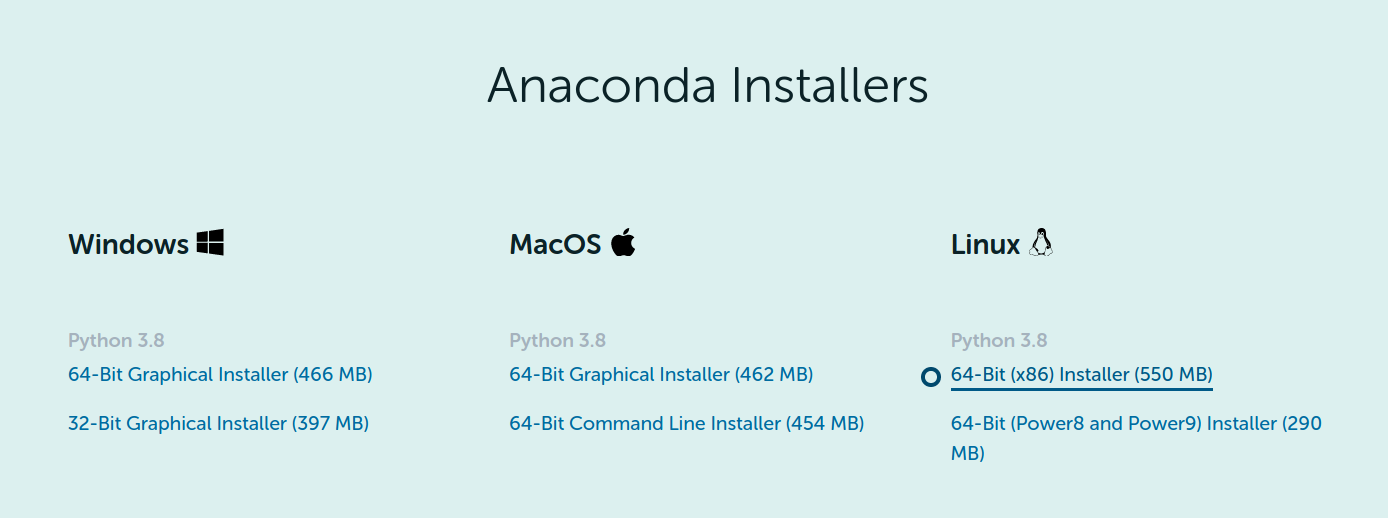

- Luego de descargado el archivo de instalación, ejecutarlo para instalar la última versión de anaconda.

- Finalmente actualice anaconda a la última versión disponible. Para ello ejecute el siguiente comando
```
conda update -n base -c defaults conda
```


# Optimización de código 

In [43]:
# Librerías a usar en todo el programa
import numpy as np
import time,math 
import matplotlib.pyplot as plt

## Formas de optimizar el código en las `funciones` y los ciclos `for`

Para ilustrar el método usemos el siguiente ejemplo: Muestre en una lista cada una de las letras de la siguiente variable `oldlist = 'Este es el texto de ejemplo'` en letra mayúscula.

In [2]:
# Escribir la solución 
oldlist = 'Este es el texto de ejemplo'



['E', 'S', 'T', 'E', ' ', 'E', 'S', ' ', 'E', 'L', ' ', 'T', 'E', 'X', 'T', 'O', ' ', 'D', 'E', ' ', 'E', 'J', 'E', 'M', 'P', 'L', 'O']


In [3]:
str.capitalize

<method 'capitalize' of 'str' objects>

- **Evitando puntos ...**
 
Suponemos que no puedes usar la función `map` o una compresión de listas. Puede estar atascado con el bucle for. El ejemplo de bucle for tiene otra ineficiencia. Tanto `newlist.append ` como `word.upper` son referencias de funciones que se reevalúan cada vez a través del ciclo. El bucle original puede ser reemplazado por:

In [4]:
oldlist = 'Este es el texto de ejemplo'


['E', 'S', 'T', 'E', ' ', 'E', 'S', ' ', 'E', 'L', ' ', 'T', 'E', 'X', 'T', 'O', ' ', 'D', 'E', ' ', 'E', 'J', 'E', 'M', 'P', 'L', 'O']


- **Variables locales.**

La aceleración final disponible para nosotros para la versión que no es un `map` del bucle for, es usar variables locales siempre que sea posible. Si el ciclo anterior se convierte como una función, las variables append y upper se convierten en locales. Python accede a las variables locales de forma mucho más eficiente que las variables globales.

In [5]:
# Generación de función para utilizar variables locales
def func(oldlist):

    return newlist

print(func(oldlist))

['E', 'S', 'T', 'E', ' ', 'E', 'S', ' ', 'E', 'L', ' ', 'T', 'E', 'X', 'T', 'O', ' ', 'D', 'E', ' ', 'E', 'J', 'E', 'M', 'P', 'L', 'O']


## Funciones lambda

Las funciones `lambda` o funciones anónimas, son un tipo de función que introduce python en su estructura, en donde se usa frecuentemente en dos situaciones principales: (a) si la función es bastante simple, y (b) si solo se usará una vez. Las funciones de Lambda se pueden usar donde sea que se requieran objetos de función

Python utiliza dos formas distintas de crear funciones: usando la sintáxis `def` y `lambda`. A continuación se muestran dos ejemplos de los usos de estas dos sintaxis:

#### Ejemplo raiz cuadrada

In [6]:
###### Usando la sintáxis def
def square_root1(x): return math.sqrt(x)

###### Usando la sintaxis lambda
square_root2 = lambda x: math.sqrt(x)

print('Usando la sintáxis def obtenemos:',square_root1(4))
print('Usando la sintáxis lambda obtenemos:',square_root2(4))

Usando la sintáxis def obtenemos: 2.0
Usando la sintáxis lambda obtenemos: 2.0


In [7]:
square_root1 = lambda x,y: x==y

Normalmente, las funciones se crean para uno de dos propósitos: (a) reducir la duplicación de código, o (b) modularizar el código.

Si tienes una función que es usada una única vez, no necesitas darle un nombre a la función. Puede ser 'anónima' y además puede definirla justo en el lugar donde desea usarlo. Ahí es donde `lambda` es útil.

## ¿Porqué el uso de la función lambda es en ocasiones confuso?

**Primero:** Lambda es confuso porque: el requisito de que una lambda **pueda tomar solo una expresión** plantea la pregunta: ¿Qué es una expresión?. En Python, ¿cuál es la diferencia entre una expresión y una declaración (statement)?. Una buena respuesta es que una <font color=red> expresión devuelve (o evalúa) un valor</font>, mientras que una declaración no.

Una pregunta que resulta entonces, es **¿qué tipo de cosas puedo, y no puedo, poner en una función lambda?** Y la respuesta a esa pregunta es básicamente
   - Si no devuelve un valor, no es una expresión y no se puede poner en una lambda.
   - Si puede imaginarlo en una declaración de asignación, en el lado derecho del signo igual, es una expresión y puede colocarse en una lambda.

Usando estas reglas podríamos entonces llegar a las siguientes conclusiones:

*1*. Los enunciados de asignación no se pueden usar en lambda. En Python, las declaraciones de asignación no devuelven nada, ni siquiera Ninguno (nulo).
     
**Ejemplo**

In [8]:
s = lambda a,h: h==a
s(1,1)

True

*2*. Cosas simples como operaciones matemáticas, operaciones de cadenas, comprensión de listas, etc. están bien en una lambda.

In [10]:
# Ejemplo
suma = lambda a,b: a+b
lista1 = np.arange(1,10)
lista2 = np.arange(11,20)

compr = [suma(lista1[i],lista2[i]) for i in range(9)]
print(compr)
print(lista1+lista2)

[12, 14, 16, 18, 20, 22, 24, 26, 28]
[12 14 16 18 20 22 24 26 28]


*3*. Las llamadas a funciones son expresiones. Está bien colocar una llamada de función en un lambda y pasar argumentos a esa función. Al hacerlo, envuelve la llamada a la función (argumentos y todo) dentro de una nueva función anónima. Incluso la función `print` puede ser usada dentro de una función lambda.

- **Ejemplo** (compresión de listas)

In [11]:
palabra = 'hola grupo es la prueba'

funUpper = lambda w: print(w.upper())
funUpper2 = lambda w: w.upper()



['H', 'O', 'L', 'A', ' ', 'G', 'R', 'U', 'P', 'O', ' ', 'E', 'S', ' ', 'L', 'A', ' ', 'P', 'R', 'U', 'E', 'B', 'A']


- **Ejemplo** (funciones anidadas)

In [12]:
def suma(a,b):
    return a+b

# función anónima
suma_potencia = lambda n,a,b: \
             print('la suma de %d y %d a la potencia %d es: %.1f' % (a,b,n, suma(a,b)**n))
suma_potencia(10,30,4.2)

la suma de 30 y 4 a la potencia 10 es: 2189077113773874.0


*4*. Las expresiones condicionales, son expresiones (y no simplemente una sintaxis diferente para una instrucción if / else). Devuelven un valor y se pueden usar en una lambda
   
**Ejemplo**

In [13]:
# Probar estas dos funciones
some_condition = lambda x,y: True if x>y else False

f1 = lambda a,b: a if some_condition(a,b) else b
f2 = lambda x: 'big' if x > 100 else 'small'

l1 = [100,25,200,5]
c1 = [f2(j) for j in l1]
print(c1)

['small', 'small', 'big', 'small']


**Segundo:** Lambda es confuso porque: lambda generalmente se describe como una herramienta para crear funciones, pero una especificación lambda no contiene una declaración de **return**.

La declaración de *return* está, en cierto sentido, implícita en una lambda. Como una especificación lambda debe contener solo una expresión, y esa expresión debe devolver un valor, una función anónima creada por lambda devuelve implícitamente el valor devuelto por la expresión. Esto tiene perfecto sentido. Aún así, la falta de una declaración de *return* explícita es, creo, parte de lo que hace que sea difícil asimilar lambda, o al menos, difícil asimilarlo rápidamente.

**Ejemplo de combinación de los dos tipos de funciones**

In [14]:
def make_incrementor(n):
    return lambda x: x + n

f = make_incrementor(22)
i1 = 0; i2 = 5
print('Incrementar en %d unidades'% i1, f(i1),'\nIncrementar en %d unidades' %i2, f(i2))
# f(100)
f(1)

Incrementar en 0 unidades 22 
Incrementar en 5 unidades 27


23

## - Función map()

Puedes pensar en la función `map()` como un `for` movido al código C. La única restricción es que el 'cuerpo de bucle' de la función `map` debe ser una llamada a función. Además del beneficio sintáctico de la compresión de listas, a menudo son tan rápidas o más rápidas que el uso equivalente del `map`. La sintaxis de la función es:

> `r = map(función, secuencia)`

Con Python 3, map () devuelve un iterador, si queremos obtener los valores numéricos debemos usar compresión de listas o el comando `list`.

**Ejemplos**

In [2]:
import numpy as np
Celsius = [39.2, 36.5, 37.3, 37.8]

# Convierta las temperaturas en °C a frados fahrenheit --> eq = float(9)/5)*i + 32

# 1. Usando llenado de listas


# 2. Usando funciones y compresión de listas


# 3. Usando funciones y funciones map


# 4. Usando vectores


# Comparar


[102.56, 97.7, 99.14, 100.03999999999999]

In [16]:
# Ahora realizar el proceso inverso de fahrenheit a °C --> eq=float(5)/9)*(x-32)
Celsius = [39.2, 36.5, 37.3, 37.8]



[102.56, 97.7, 99.14, 100.03999999999999]
[39.2, 36.5, 37.300000000000004, 37.8]


In [17]:
def suma(a,b):
    return a+b

s = lambda a,b:a+b
# s = suma(1,2)
s(1,2)

3

In [13]:
# Tres métodos diferentes para aplicar una función a datos a una lista
oldlist = 'Este es el texto de ejemplo'

tiempo = []
########### Agregando datos a una lista
newlist1 = []

    
############  Usando la función map

############ Usando compresión de listas

print('Con el método de agregar datos a la lista:\n',newlist1)
print('Usando la funcion map:\n',newlist2)
print('Usando compresión de listas:\n', newlist3)


Con el método de agregar datos a la lista:
 ['E', 'S', 'T', 'E', ' ', 'E', 'S', ' ', 'E', 'L', ' ', 'T', 'E', 'X', 'T', 'O', ' ', 'D', 'E', ' ', 'E', 'J', 'E', 'M', 'P', 'L', 'O']
Usando la funcion map:
 ['E', 'S', 'T', 'E', ' ', 'E', 'S', ' ', 'E', 'L', ' ', 'T', 'E', 'X', 'T', 'O', ' ', 'D', 'E', ' ', 'E', 'J', 'E', 'M', 'P', 'L', 'O']
Usando compresión de listas:
 ['E', 'S', 'T', 'E', ' ', 'E', 'S', ' ', 'E', 'L', ' ', 'T', 'E', 'X', 'T', 'O', ' ', 'D', 'E', ' ', 'E', 'J', 'E', 'M', 'P', 'L', 'O']


- Mientras todavía utilizamos `lamda` como una función, podemos tener una lista de funciones como una secuencia:

**Ejemplo a)**: Construyamos un programa usando `map`, compresión de listas y estructura `for` típica para evaluar un vector de tamaño `N` para una lista de funciones

In [19]:
# Escribir el programa acá 
N = 3
fns = [np.arctan,np.cos,np.sin]
xs = np.arange(N)

# 1. For típico

# 2. Compresión de listas

# 3. Funciones map

# print('f1 = ',call)
# print('f2 = ',call2)
# print('f3 = ',call3)


[array([0.        , 0.78539816, 1.10714872]),
 array([ 1.        ,  0.54030231, -0.41614684]),
 array([0.        , 0.84147098, 0.90929743])]

**Ejemplo b)**

In [14]:
def square(x):
        return (x**2)
def cube(x):
        return (x**3)

funcs = [square, cube]

# Combinar map y compresión de listas para evaluar números 0-5 de cada función en cada iteración 

print(value)

[[0, 0], [1, 1], [4, 8], [9, 27], [16, 64]]


-  Además de eso, la función `map` se puede usar de manera más avanzada. Por ejemplo, dados múltiples argumentos de secuencia, envía elementos tomados de secuencias en paralelo como argumentos distintos a la función:

**Ejemplo**

In [21]:
p1 = pow(2,10)
p2 = pow(3,5)
p3 = pow(3,11)
p4 = pow(4,12)
print('Estos son los resultados de las potencias:',p1,p2,p3,p4)

# Replicar lo anterior usando funciones map

print('Estos son los resultados usando map:',pot_map)

Estos son los resultados de las potencias: 1024 243 177147 16777216
Estos son los resultados usando map: [1024, 243, 177147, 16777216]


Como programaría usando compresión de listas y funciones map, el caso cuando quiero evaluar de una lista de números dada, elevar cada número de dicha lista, a una lista de potencias dadas.

In [6]:
import numpy as np
L1 =[2, 3, 3, 4]
L2 =[10, 5, 11, 12]

pot_map2

[[1024.0, 32.0, 2048.0, 4096.0],
 [59049.0, 243.0, 177147.0, 531441.0],
 [59049.0, 243.0, 177147.0, 531441.0],
 [1048576.0, 1024.0, 4194304.0, 16777216.0]]

## - Función filter()

La función 
> `filter(función, lista)` 

ofrece una forma elegante de filtrar todos los elementos de una lista, para lo cual la función de `función` devuelve `True`. 
La función `filter(f, l)` necesita una función f como primer argumento. `f` devuelve un valor booleano, es decir, verdadero o falso. Esta función se aplicará a cada elemento de la lista `l`. Solo si `f` devuelve True, el elemento de la lista se incluirá en la lista de resultados.

**Ejemplo**

In [22]:
fib = [0,1,1,2,3,5,8,13,21,34,55]
# Selecciona los números impares de la lista
result = list(filter(lambda x: x % 2, fib))
print('Numeros impares de la lista:',result)

# Selecciona los números pares de la lista
result = list(filter(lambda x: x % 2 == 0, fib))
print('Numeros pares de la lista:',result)


Numeros impares de la lista: [1, 1, 3, 5, 13, 21, 55]
Numeros pares de la lista: [0, 2, 8, 34]


In [16]:
# Replicar los mismo usando vectores

pares, impares

(array([ 0,  2,  8, 34]), array([ 1,  1,  3,  5, 13, 21, 55]))

In [38]:
5%2

1

## - Función reduce()
La función
> `reduce(func, secuencia)`

continuamente aplica la función `func()` a la `secuencia`. Devuelve un solo valor.

Si `secuencia = [s1, s2, s3, ..., sn]`, la llamada de la función `reduce(func, secuencia)` funciona así: 
 
   - Al principio, los primeros dos elementos de secuencia se aplicarán a `func`, es decir, `func(s1, s2)`. La lista en la que se trabaja con reduce() se ve así: `[func (s1, s2), s3, ..., sn ] `
   - En el siguiente paso, se aplicará func sobre el resultado anterior y el tercer elemento de la lista, es decir, `func (func (s1, s2), s3) `
   - La lista se ve así ahora: `[func(func (s1, s2), s3), ..., sn] `
   - Continuar así hasta que quede un solo elemento y devolver este elemento como resultado de reduce()

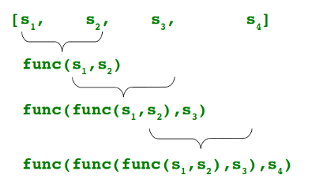

**Ejemplos**

In [24]:
from functools import reduce

# Realiza la suma de los elementos de una lista
print('La suma de la lista es:',reduce(lambda x,y: x+y, [47,11,42,13]))

# Determinar el máximo de una lista de valores numéricos 
f = lambda a,b: a if (a > b) else b
print('El máximo valor de la lista es:',reduce(f, [47,11,42,102,13]))

# Calcular el producto de una lista 
print('El producto de la lista es:',reduce(lambda x, y: x*y, range(1,49)))

La suma de la lista es: 113
El máximo valor de la lista es: 102
El producto de la lista es: 12413915592536072670862289047373375038521486354677760000000000


> Página donde pueden profundizar un poco más acerca de las funciones `map, filter, and reduce` [Enlace](http://www.bogotobogo.com/python/python_fncs_map_filter_reduce.php)

# Colecciones de variables con alto rendimiento computacional

https://docs.python.org/3/library/collections.html

## - Función `Counter()`
Se proporciona una herramienta de contador para respaldar recuentos rápidos y convenientes. Por ejemplo:

In [22]:
from collections import Counter

cnt = Counter()
colors = ['red', 'blue', 'red', 'green', 'blue', 'blue']

Counter(colors)

Counter({'red': 2, 'blue': 3, 'green': 1})

In [28]:
# Find the ten most common words 
words = """
 In 1973, the Chicago Board of Options Exchange begun trading options in exchanges, although previously options 
 had been regularly traded by financial institutions in over the counter markets. In the same year, Black and 
 Scholes (1973), and Merton (1973), published their seminal papers on the theory of option pricing. Since then 
 the growth of the field of derivative securities has been phenomenal. In recognition of their pioneering and 
 fundamental contribution to option valuation, Scholes and Merton received in 1997 the Award of the Nobel Prize 
 in Economics. Unfortunately, Black was unable to receive the award since he had already passed away.

In essence, the Black-Scholes model states that by continuously adjusting the proportions of stocks and options 
in a portfolio, the investor can create a riskless hedge portfolio, where all market risks are eliminated. The 
ability to construct such a portfolio relies on the assumptions of continuous trading and continuous sample paths
of the asset price. In an efficient market with no riskless arbitrage opportunities, any portfolio with a zero 
market risk must have an expected rate of return equal to the risk-free interest rate. This approach led to the 
differential equation, known in physics as the "heat equation". Its solution is the Black-Scholes formula for 
pricing European options on non-dividend paying stocks 
"""
# método .most_common(10)


[('the', 18),
 ('of', 10),
 ('in', 6),
 ('and', 6),
 ('In', 5),
 ('to', 5),
 ('options', 4),
 ('a', 4),
 ('on', 3),
 ('market', 3)]

## - Función `deque()`
Devuelve un nuevo objeto deque inicializado de izquierda a derecha (usando `append()`) con datos de iterable. Si no se especifica iterable, la nueva deque es vacía.

Los deques son una generalización de pilas y colas (el nombre se pronuncia 'deck' y es la abreviatura de 'cola de dos extremos' ('double-ended queue')). Los Deques admiten 'memory efficient appends' , salto de elementos desde cualquier lado del deque con aproximadamente el mismo rendimiento $O(1)$ en cualquier dirección.

Aunque los objetos de lista admiten operaciones similares, están optimizados para operaciones rápidas de longitud fija e incurren en costos de movimiento de memoria $O(n)$ para operaciones de inserción `pop(0)` e inserción `insert(0, v)` que cambian tanto el tamaño como la posición de la representación de datos subyacentes .

Si no se especifica maxlen o es `None`, los deques pueden crecer hasta una longitud arbitraria. De lo contrario, la deque está limitada a la longitud máxima especificada. Una vez que se llena una etiqueta de longitud limitada, cuando se agregan nuevos elementos, se descarta el número correspondiente de elementos del extremo opuesto. Los deques de longitud limitada proporcionan una funcionalidad similar al filtro de cola en Unix. También son útiles para rastrear transacciones y otros grupos de datos donde solo la actividad más reciente es de interés.

In [29]:
from collections import deque
d = deque('ghi')                 # make a new deque with three items
for elem in d:                   # iterate over the deque's elements
    print(elem.upper())

G
H
I


In [30]:
d.append('j')                    # add a new entry to the right side
d.appendleft('f')                # add a new entry to the left side
d     

deque(['f', 'g', 'h', 'i', 'j'])

In [31]:
d.pop()                          # return and remove the rightmost item
d.popleft()                      # return and remove the leftmost item
list(d)  

['g', 'h', 'i']

In [32]:
list(reversed(d))                # list the contents of a deque in reverse

['i', 'h', 'g']

In [33]:
'h' in d                         # search the deque

True

In [34]:
d.extend('jkl')                  # add multiple elements at once
d

deque(['g', 'h', 'i', 'j', 'k', 'l'])

In [35]:
d.rotate(1)                      # right rotation
d

deque(['l', 'g', 'h', 'i', 'j', 'k'])

In [36]:
d.rotate(-1)                     # left rotation
d

deque(['g', 'h', 'i', 'j', 'k', 'l'])

In [37]:
deque(reversed(d))               # make a new deque in reverse order

deque(['l', 'k', 'j', 'i', 'h', 'g'])

In [41]:
d.clear()                        # empty the deque

d.extendleft('abc')              # extendleft() reverses the input order
d

deque(['c', 'b', 'a'])

## Comparación tiempo de simulación para grandes cantidades de datos 

Lo que se pretende en este apartado es mostrar la forma mas eficiente de realizar cálculos cuando se tiene gran cantidad de datos. Se comparán las técnicas tales como: ciclos for, paquete numpy, compresión de listas y la función map. Para efectos de simulación se desea comparar los tiempos necesarios para calular el valor del $log_{10}$ para un vector de tamaño $1\times 10^7$, que contiene valores aleatorios flotantes obtenidos mediante un distribución normal, para las cuatro técnicas mencionadas anteriormente.

In [56]:
# Número de muestras
N = 10**7
# Lista con valores aleatorios
l1 = np.random.normal(50,5,N)
speed = []

############ Usando ciclo for
t1 = time.time()
l2 = []
for item in l1:
    l2.append(math.log10(item))
t2 = time.time()
print("Con ciclos for y agregando los resutados toma {} segundos".format(t2-t1))
speed.append(t2-t1)

Con ciclos for y agregando los resutados toma 3.2780444622039795 segundos


In [57]:
########### Usando numpy
t1=time.time()
a2=np.log10(l1)
t2 = time.time()
print("Usando la librería Numpy y el método log10 toma {} segundos".format(t2-t1))
speed.append(t2-t1)

Usando la librería Numpy y el método log10 toma 0.15039491653442383 segundos


In [58]:
########### Usando comprensión de listas
t1=time.time()
cl=[math.log10(i) for i in l1]
t2 = time.time()
print("Usando compresión de listas toma {} segundos".format(t2-t1))
speed.append(t2-t1)

Usando compresión de listas toma 2.7697794437408447 segundos


In [59]:
########### Usando map function 
t1 = time.time()
m1 = list(map(lambda x:math.log10(x),l1))
t2 = time.time()
print("Usando la función map para el método log10 toma {} segundos".format(t2-t1))
speed.append(t2-t1)

Usando la función map para el método log10 toma 2.8650527000427246 segundos


In [60]:
########### Usando deque function
t1 = time.time()
deq = deque(maxlen=N)
for item in l1:
    deq.append(math.log10(item))
t2 = time.time()

print("Usando deque function toma {} segundos".format(t2-t1))
speed.append(t2-t1)

Usando deque function toma 3.5994508266448975 segundos


In [80]:
########### Usando pandas
import pandas as pd

t1 = time.time()
pandas = pd.Series(l1)
pandas = pandas.apply(math.log10)
t2 = time.time()

print("Usando pandas toma {} segundos".format(t2-t1))
speed.append(t2-t1)

Usando pandas toma 2.5593860149383545 segundos


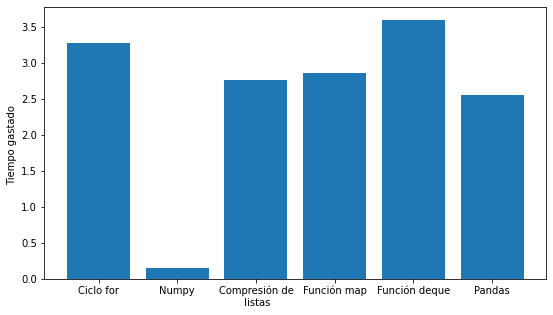

In [83]:
ind = np.arange(1, 7)
plt.figure(figsize=[9,5])
plt.bar(ind,speed)
plt.xticks(ind,['Ciclo for', 'Numpy', 'Compresión de\n listas','Función map', 'Función deque', 'Pandas'])
plt.ylabel('Tiempo gastado ')
plt.show()

### Tarea:

1. Imagine una rutina contable utilizada en una librería. Funciona en una lista con sublistas, que se ven así:
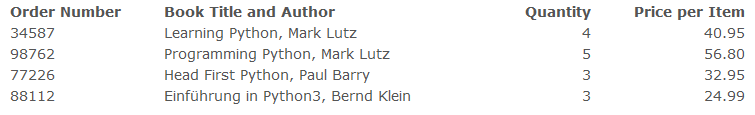
Escriba un programa en Python, que devuelve una lista con tuplas de tamaño 2. Cada tupla consiste en el número de pedido y el costo total del pedido. El producto debe aumentarse en 10€ si el valor de la orden es inferior a 100,00 €. 
Escribe un programa Python usando unicamente las funciones **lambda y map**.

`orders = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]`
           
2. La misma librería, pero esta vez trabajamos en una lista diferente. Las sublistas de nuestras listas se ven así: 
[número de orden, (número de artículo, cantidad, precio por unidad), ... (número de artículo, cantidad, precio por unidad)] 

`orders = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
	       [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
	       [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
           [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]`

Escriba un programa que devuelva una lista de dos tuplas que tengan la información de (número de pedido, cantidad total de pedido). Utilice la función `Reduce`. Recuerde el precio del pedido del producto debe aumentarse en 10€ si el valor de la orden es inferior a 100,00 €.

3. Resolver los anteriores ejercicios usando pandas (DataFrame)

In [10]:
########### Solución 1
orders = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]

# El resultado debe ser como muestro en el resultado de esta celda

[['34587', 163.8],
 ['98762', 284.0],
 ['77226', 108.85000000000001],
 ['88112', 84.97]]

In [63]:
########### Solución 2
orders = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
          [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
          [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
          [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]



In [54]:
# Esta debe de ser su solución

[[1, 4725810.37476],
 [2, 40418.5905],
 [3, 27464.259899999997],
 [4, 3919302.280575]]

4. Use filter to eliminate all words that are shorter than 4 letters from a list of words
`list='the notion of a lambda function goes all the way back to the origin of computer science'`

In [64]:
# Respuesta

['notion',
 'lambda',
 'function',
 'goes',
 'back',
 'origin',
 'computer',
 'science']

5. Use filter to determine the percentage of Fahrenheit temperatures in a list are within the range 32 to 80

In [33]:
########### Solución 4
import numpy as np
np.random.seed(55555)
temperatures = np.random.uniform(25,110,30)
print(temperatures)

[ 35.97387961  99.13294268  92.6178302   99.69549478  63.21119535
  73.90387697  95.50028838  99.21476553  36.98251238 101.45813729
 100.5917418   89.38159435  89.52156589  83.8084752   28.37990868
  68.75395211  45.86132067  36.58307493  56.32208365  33.96219302
  45.29071318  74.86289938  66.51091383  88.19316186  94.26635864
  46.83131624 109.60744472 109.68427993  44.55796499  92.84146259]


In [68]:
# Respuesta

[35.97387961379455,
 63.211195349983264,
 73.90387696517755,
 36.982512376595906,
 68.75395211338406,
 45.86132066984196,
 36.58307493022292,
 56.322083650154724,
 33.9621930206693,
 45.29071317816652,
 74.86289938282341,
 66.51091382521807,
 46.831316244170544,
 44.55796498523391]

6. Use reduce to find the lower left corner (minimum x and minimum y value) for a list of point locations
> **Hint**: Explore the command `np.minimum.reduce` [link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ufunc.reduce.html)

In [125]:
########### Solución 5
np.random.seed(55555)
point_xy = np.random.randint(0,100,[30,2])
print(point_xy)

[[17 97]
 [22 33]
 [37 46]
 [57 28]
 [11 25]
 [14  2]
 [74 16]
 [12 37]
 [35 21]
 [66 65]
 [86 58]
 [67 81]
 [ 0 48]
 [28 66]
 [76 22]
 [46 47]
 [64  7]
 [88 94]
 [65 13]
 [75 89]
 [23 17]
 [36 63]
 [62 36]
 [64 17]
 [18 19]
 [88 41]
 [21 49]
 [98 36]
 [81 73]
 [62 90]]


30

In [134]:
# Respuesta

array([0, 2])

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga
</footer>